## PROBLEM  STATEMENT

##### 1.Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

## 2.Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [2]:
blood = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
blood.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [3]:
blood.drop(['Unnamed: 0'],axis = 1,inplace=True)


In [4]:
blood.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
blood['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

## 3. Checking info

In [6]:
blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   576 non-null    int64
 1   Number of Donations          576 non-null    int64
 2   Total Volume Donated (c.c.)  576 non-null    int64
 3   Months since First Donation  576 non-null    int64
 4   Made Donation in March 2007  576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


<AxesSubplot:ylabel='Months since Last Donation'>

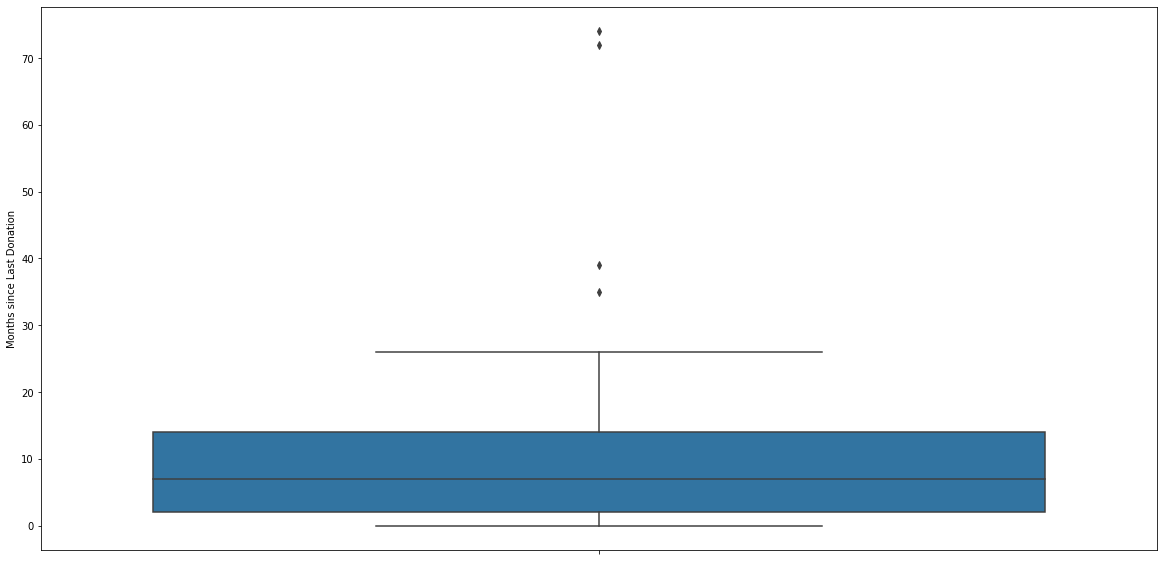

In [7]:
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data = blood)

###### We see from the above boxplot that the maximum people have donated blood in nearby 10 months.

## By seeing our data we can easily tell that our data is fully numerical based ,which is good for bulding a model

#### 4.Lets create a target column

In [8]:
blood.rename(columns = {'Made Donation in March 2007':'target'},inplace = True)

In [9]:
blood.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## 5.Checking the target indices

####  We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:

###### 0 - the donor will not give blood
###### 1 - the donor will give blood
###### Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.

In [10]:
blood.target.value_counts(normalize=True)

0    0.760417
1    0.239583
Name: target, dtype: float64

## 6. Splitting the data into train test and split

In [11]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

In [12]:
X = blood.iloc[:,:-1]
y = blood.target

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=45,stratify=blood.target)

In [14]:
X_train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
291,14,1,250,14
559,21,1,250,21
250,9,5,1250,51
247,14,4,1000,26
547,21,6,1500,48


In [15]:
X_train.shape

(432, 4)

In [16]:
X_test.shape

(144, 4)

In [17]:
y_train.shape

(432,)

In [18]:
y_test.shape

(144,)

# Logestic Regression

In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7361111111111112

In [20]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7361111111111112


col_0,0,1
target,,
0,106,3
1,35,0


In [21]:
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.7275229357798166

ROC-AUC_SCORE 0.7275229357798166


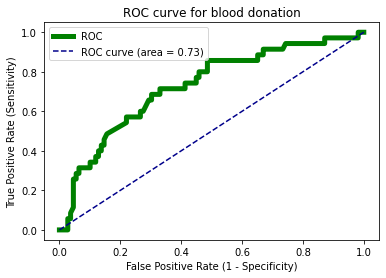

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_predict = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve for blood donation')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5,label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.legend()
print("ROC-AUC_SCORE",roc_auc_score(y_test,y_predict))
plt.show()

# SUPER VECTOR MACHINE

In [23]:
### SVC classifier
model = SVC(C=0.1)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7569444444444444

# RANDOM FOREST

In [24]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.75

In [25]:
from xgboost import XGBClassifier

In [26]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

C:\Users\bsmah\Documents\Python Scripts\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7430555555555556

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       109
           1       0.47      0.43      0.45        35

    accuracy                           0.74       144
   macro avg       0.65      0.64      0.64       144
weighted avg       0.74      0.74      0.74       144



In [28]:
confusion_matrix(y_test,y_predict)

array([[92, 17],
       [20, 15]], dtype=int64)

In [29]:
pd.crosstab(y_test,y_predict)

col_0,0,1
target,,
0,92,17
1,20,15


In [30]:
model.score(X_train,y_train) # Training Score

0.9398148148148148

In [31]:
model.score(X_test,y_test) # Testing Score

0.7430555555555556